In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [9]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [10]:
print("Missing values in training data:\n", train_df.isnull().sum())
print("Missing values in test data:\n", test_df.isnull().sum()) #no missing values....

Missing values in training data:
 0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64
Missing values in test data:
 0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64


In [11]:
X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
X_test  = test_df.drop("label", axis=1).values
y_test  = test_df["label"].values


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [13]:
results = {}

In [21]:
### Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=15, verbose=2, random_state=0)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
results['Logistic Regression'] = acc_logreg

print("Logistic Regression Accuracy:", acc_logreg)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


max_iter reached after 102 seconds
Logistic Regression Accuracy: 0.9089
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.93      0.97      0.95      1135
           2       0.93      0.87      0.90      1032
           3       0.90      0.90      0.90      1010
           4       0.89      0.94      0.91       982
           5       0.89      0.85      0.87       892
           6       0.93      0.94      0.93       958
           7       0.91      0.91      0.91      1028
           8       0.88      0.84      0.86       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



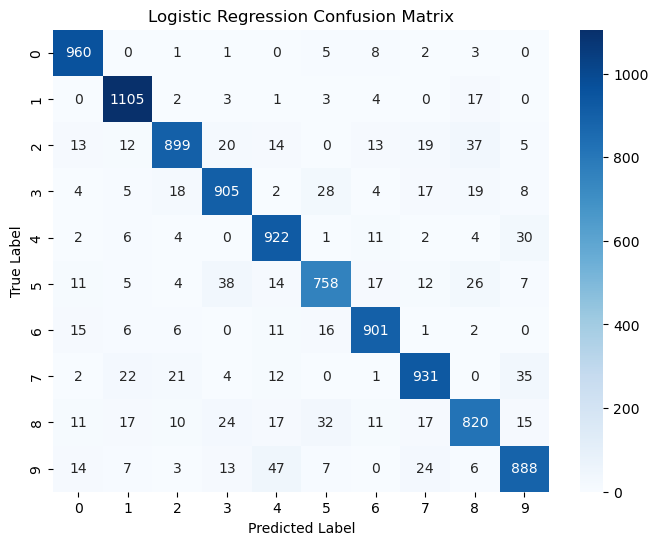

In [23]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
### Model 2: k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)  
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
results['KNN'] = acc_knn

print("KNN Accuracy:", acc_knn)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9429
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.96      0.92      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.96      0.93      0.94       982
           5       0.93      0.93      0.93       892
           6       0.96      0.97      0.97       958
           7       0.93      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



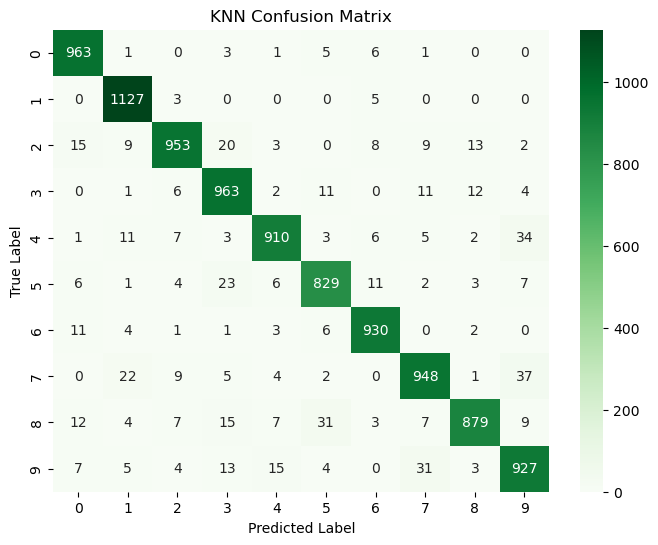

In [37]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
### Model 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)
results['Decision Tree'] = acc_dt

print("Decision Tree Accuracy:", acc_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8662
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



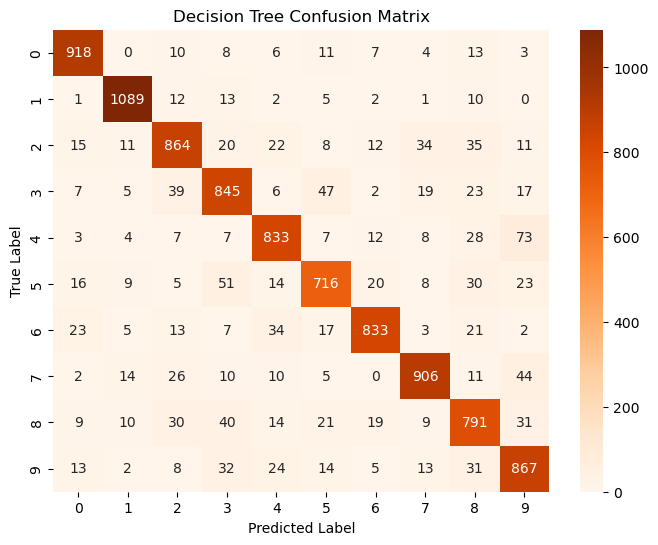

In [31]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

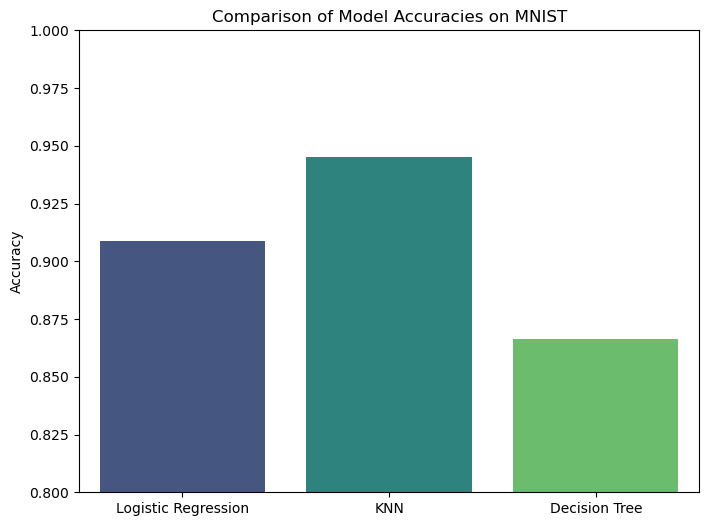

Performance Summary:
Logistic Regression: Accuracy = 0.9089
KNN: Accuracy = 0.9452
Decision Tree: Accuracy = 0.8662

 The Best Performing Model is: **KNN** with an accuracy of 0.9452


In [33]:
# Compare the Models
models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.8, 1)  
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies on MNIST")
plt.show()

# Performance Summary
print("Performance Summary:")
for model, acc in results.items():
    print(f"{model}: Accuracy = {acc:.4f}")

# Best model based on highest accuracy
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print(f"\n The Best Performing Model is: **{best_model}** with an accuracy of {best_accuracy:.4f}")